In [1]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pickle
import pandas as pd
import numpy as np

In [2]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

### Train Model for Transformations 1

In [11]:
#load data
features = pickle.load(open('data.p', 'rb'))
target = pickle.load(open('target.p', 'rb'))

In [12]:
#check if shapes are matching
features.shape, target.shape

((21533, 75), (21533,))

In [13]:
#create train & test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.10, random_state=42)

In [14]:
#peform stepwise selection for model 1 (transformation 1)
included = stepwise_selection(X_train, y_train)

Add  zip_98004                      with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zip_98039                      with p-value 9.75369e-250
Add  zip_98112                      with p-value 8.47331e-187
Add  zip_98040                      with p-value 9.10003e-183
Add  zip_98105                      with p-value 8.70604e-84
Add  zip_98119                      with p-value 2.97813e-81
Add  zip_98033                      with p-value 8.49261e-83
Add  zip_98199                      with p-value 5.70924e-81
Add  zip_98006                      with p-value 2.99719e-79
Add  zip_98103                      with p-value 2.49637e-78
Add  zip_98115                      with p-value 6.77261e-78
Add  zip_98117                      with p-value 3.65907e-77
Add  zip_98102                      with p-value 6.15602e-78
Add  zip_98109                      with p-value 1.68

In [16]:
#build final model
linreg = LinearRegression().fit(X_train[included] , y_train)

In [18]:
linreg.score(X_train[included], y_train)

0.7011474334990777

### Train model with Transformations 2

In [19]:
#get second way of transforming values and create splits
features_2 = pickle.load(open('data_2.p', 'rb'))
X2_train, X2_test, y_train, y_test = train_test_split(features_2, target, test_size=0.10, random_state=42)

In [20]:
#check if same set of data points (with different columns created)
a = np.array([X_train.index == X2_train.index])
a.all()

True

In [21]:
#double check cofrecgt columns
X2_train.columns

Index(['sqft_living15', 'sqft_lot', 'bathrooms', 'bedrooms', 'grade',
       'reno_age', 'waterfront', 'zip_98001', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98

In [22]:
#perform stepwise selection for model 2: transformations 2
included2 = stepwise_selection(X2_train, y_train)

Add  zip_98004                      with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  grade                          with p-value 0.0
Add  reno_age                       with p-value 1.11058e-304
Add  zip_98039                      with p-value 9.61827e-253
Add  zip_98112                      with p-value 1.11476e-124
Add  zip_98040                      with p-value 2.21252e-129
Add  bathrooms                      with p-value 2.66016e-89
Drop bedrooms                       with p-value 0.115319


/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  zip_98023                      with p-value 6.15675e-88
Add  zip_98033                      with p-value 8.06056e-71
Add  zip_98092                      with p-value 1.50734e-52
Add  zip_98042                      with p-value 4.00469e-49
Add  zip_98003                      with p-value 2.61939e-50
Add  zip_98105                      with p-value 1.53027e-47
Add  zip_98119                      with p-value 2.58371e-46
Add  zip_98199                      with p-value 3.17093e-47
Add  zip_98115                      with p-value 1.573e-43
Add  zip_98117                      with p-value 6.79352e-44
Add  zip_98103                      with p-value 5.59218e-48
Add  zip_98109                      with p-value 1.58287e-42
Add  zip_98006                      with p-value 1.38833e-39
Add  zip_98102                      with p-value 1.0332e-40
Add  zip_98038                      with p-value 2.30901e-34
Add  zip_98058                      with p-value 2.53512e-36
Add  zip_98001             

In [23]:
#check that we selected different features from model 1
list(set(included) - set(included2))

['zip_98055',
 'zip_98188',
 'sqft_living',
 'zip_98002',
 'zip_98019',
 'zip_98010',
 'zip_98072',
 'zip_98045']

In [25]:
#build model 2 with selected features
linreg1 = LinearRegression().fit(X2_train[included2] , y_train)

In [26]:
linreg1.score(X2_train[included2] , y_train)

0.7103143915230632

Looks like there was some improvement, but see next section for full comparison

### Prediction & comparison of models

In [29]:
#Get prdictions from different models
print(round(linreg.score(X_test[included], y_test), 3))
print(round(linreg1.score(X2_test[included2], y_test) , 3))

0.707
0.716


* Adjusted R Squared in this second model has a .01 improvement over the first model using hte test set similar to the train set

In [31]:
#get predictions for test and train for both models to use in RMSE calculations
y_hat_test = linreg.predict(X_test[included])
y2_hat_test = linreg1.predict(X2_test[included2])

ytrain_hat_test = linreg.predict(X_train[included])
ytrain2_hat_test = linreg1.predict(X2_train[included2])

In [32]:
#get rmse values & print diff
linereg_rmse_train = np.sqrt(mean_squared_error(y_train, ytrain_hat_test))
linereg2_rmse_train = np.sqrt(mean_squared_error(y_train, ytrain2_hat_test))

linereg_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
linereg2_rmse = np.sqrt(mean_squared_error(y_test, y2_hat_test))

print('First model train RMSE:', int(linereg_rmse_train))
print('Second model train RMSE:', int(linereg2_rmse_train))

print('First model root RMSE:', int(linereg_rmse))
print('Second model root RMSE:', int(linereg2_rmse))
print(int(linereg_rmse - linereg_rmse_train ))
print(int(linereg2_rmse - linereg2_rmse_train))

First model train RMSE: 200767
Second model train RMSE: 197664
First model root RMSE: 192274
Second model root RMSE: 189197
-8493
-8467


The second model is best by several different measures. Scores on the train and test said is better by 0.1. The RMSE is better by about 3,000 dollars. Both models have a similar difference in train & test RMSE so neither one is better in terms of over or underfitting.  Second model is best. Going forward, I use the second set of transformaiton to add date and lat/long features.

## Modeling with transformations 2 & date info

In [33]:
#load data with second transformations & date info
features_date = pickle.load(open('data_2_date.p', 'rb'))
XD_train, XD_test, y_train, y_test = train_test_split(features_date, target, test_size=0.10, random_state=42)

In [34]:
#check if same set of data points (with different columns created)
a = np.array([XD_train.index == X2_train.index])
a.all()

True

In [35]:
#perform stepwise selection
included_d = stepwise_selection(XD_train, y_train)
included_d

Add  zip_98004                      with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  grade                          with p-value 0.0
Add  reno_age                       with p-value 1.11058e-304
Add  zip_98039                      with p-value 9.61827e-253
Add  zip_98112                      with p-value 1.11476e-124
Add  zip_98040                      with p-value 2.21252e-129
Add  bathrooms                      with p-value 2.66016e-89
Drop bedrooms                       with p-value 0.115319


/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  zip_98023                      with p-value 6.15675e-88
Add  zip_98033                      with p-value 8.06056e-71
Add  zip_98092                      with p-value 1.50734e-52
Add  zip_98042                      with p-value 4.00469e-49
Add  zip_98003                      with p-value 2.61939e-50
Add  zip_98105                      with p-value 1.53027e-47
Add  zip_98119                      with p-value 2.58371e-46
Add  zip_98199                      with p-value 3.17093e-47
Add  zip_98115                      with p-value 1.573e-43
Add  zip_98117                      with p-value 6.79352e-44
Add  zip_98103                      with p-value 5.59218e-48
Add  zip_98109                      with p-value 1.58287e-42
Add  zip_98006                      with p-value 1.38833e-39
Add  zip_98102                      with p-value 1.0332e-40
Add  zip_98038                      with p-value 2.30901e-34
Add  zip_98058                      with p-value 2.53512e-36
Add  zip_98001             

['zip_98004',
 'waterfront',
 'sqft_living15',
 'grade',
 'reno_age',
 'zip_98039',
 'zip_98112',
 'zip_98040',
 'bathrooms',
 'zip_98023',
 'zip_98033',
 'zip_98092',
 'zip_98042',
 'zip_98003',
 'zip_98105',
 'zip_98119',
 'zip_98199',
 'zip_98115',
 'zip_98117',
 'zip_98103',
 'zip_98109',
 'zip_98006',
 'zip_98102',
 'zip_98038',
 'zip_98058',
 'zip_98001',
 'sqft_lot',
 'zip_98144',
 'zip_98107',
 'zip_98116',
 'zip_98122',
 'zip_98031',
 'zip_98030',
 'zip_98136',
 'zip_98022',
 'zip_98198',
 'zip_98126',
 'zip_98177',
 'zip_98118',
 'zip_98008',
 'day_since_min',
 'zip_98125',
 'bedrooms',
 'zip_98070',
 'zip_98005',
 'zip_98052',
 'zip_98053',
 'zip_98034',
 'zip_98032',
 'zip_98133',
 'zip_98106',
 'zip_98029',
 'zip_98007',
 'zip_98075',
 'zip_98146',
 'zip_98027',
 'zip_98074',
 'zip_98155',
 'zip_98108',
 'zip_98056',
 'zip_98065']

In [42]:
#build final model and get score
linreg_d = LinearRegression().fit(XD_train[included_d] , y_train)
linreg_d.score(XD_train[included_d] , y_train)

0.7113005967470172

In [38]:
#Get prdictions from different models
print(linreg_d.score(XD_test[included_d], y_test))
yD_hat_test = linreg_d.predict(XD_test[included_d])

linreg_d_rmse = np.sqrt(mean_squared_error(y_test, yD_hat_test))
print('First model RMSE:', int(linereg_rmse))
print('Second Model RMSE:', int(linereg2_rmse))
print('Third Model RMSE:', int(linreg_d_rmse))

0.7189371247594474
First model RMSE: 192274
Second Model RMSE: 189197
Third Model RMSE: 188268


This third model does better than the first two. Both in the train (0.711) and test scores (0.718) compared to the second model which had train 0.710 and 0.716 on the test data. Similarly, the RMSE is about 1.8k better error.

In [39]:
#inspect columns chosen for this model
XD_train.columns

Index(['sqft_living15', 'sqft_lot', 'bathrooms', 'bedrooms', 'grade',
       'reno_age', 'waterfront', 'zip_98001', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98

### Train Model with Transformations 2, date and lat/long numerical

In [40]:
#load and select data
features_date_latlong = pickle.load(open('data_2_date_latlong.p', 'rb'))
XDL_train, XDL_test, y_train, y_test = train_test_split(features_date_latlong, target, test_size=0.10, random_state=42)

#check if same set of data points (with different columns created)
a = np.array([XDL_train.index == X_train.index])
a.all()

True

In [41]:
# perform stepwise selection
included_dl = stepwise_selection(XDL_train, y_train)
included_dl

Add  zip_98004                      with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  grade                          with p-value 0.0
Add  zip_98039                      with p-value 7.55554e-271
Add  reno_age                       with p-value 5.08135e-197
Add  zip_98040                      with p-value 5.25154e-142
Add  zip_98112                      with p-value 6.4036e-138
Add  bathrooms                      with p-value 2.48206e-90
Add  zip_98033                      with p-value 1.06931e-39
Add  zip_98119                      with p-value 1.84216e-40
Add  zip_98006                      with p-value 8.62583e-40
Add  zip_98105                      with p-value 4.31884e-42
Add  zip_98199                      with p-value 8.39708e-42
Add  zip_98109                      with p-value 5.86161e-36
Add  zip

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


['zip_98004',
 'bedrooms',
 'waterfront',
 'lat',
 'sqft_living15',
 'grade',
 'zip_98039',
 'reno_age',
 'zip_98040',
 'zip_98112',
 'bathrooms',
 'zip_98033',
 'zip_98119',
 'zip_98006',
 'zip_98105',
 'zip_98199',
 'zip_98109',
 'zip_98102',
 'zip_98028',
 'zip_98155',
 'zip_98133',
 'sqft_lot',
 'long',
 'zip_98011',
 'zip_98072',
 'zip_98077',
 'zip_98019',
 'zip_98034',
 'zip_98125',
 'zip_98022',
 'zip_98144',
 'zip_98052',
 'zip_98002',
 'day_since_min',
 'zip_98122',
 'zip_98116',
 'zip_98014',
 'zip_98074',
 'zip_98053',
 'zip_98136',
 'zip_98010',
 'zip_98058',
 'zip_98070',
 'zip_98126',
 'zip_98103',
 'zip_98118',
 'zip_98107',
 'zip_98115',
 'zip_98117',
 'zip_98031',
 'zip_98008',
 'zip_98029',
 'zip_98027',
 'zip_98005',
 'zip_98106',
 'zip_98146']

In [43]:
#build final model and get scores
linreg_dl = LinearRegression().fit(XDL_train[included_dl] , y_train)
linreg_dl.score(XDL_train[included_dl] , y_train)

0.7105326931771181

In [47]:
#Get score of train data
print('Train Data Scores')
print(linreg.score(X_train[included], y_train))
print(linreg1.score(X2_train[included2], y_train))
print(linreg_d.score(XD_train[included_d], y_train))
print(linreg_dl.score(XDL_train[included_dl], y_train))
print('-------')
#Get score from test data
print('Test Data Scores')
print(linreg.score(X_test[included], y_test))
print(linreg1.score(X2_test[included2], y_test))
print(linreg_d.score(XD_test[included_d], y_test))
print(linreg_dl.score(XDL_test[included_dl], y_test))
print('-------')

yDL_hat_test = linreg_dl.predict(XDL_test[included_dl])
yDL_hat_train = linreg_dl.predict(XDL_train[included_dl])

linreg_dl_rmse = np.sqrt(mean_squared_error(y_test, yDL_hat_test))
linreg_dl_rmse_train = np.sqrt(mean_squared_error(y_train, yDL_hat_train))

yD_hat_train = linreg_d.predict(XD_train[included_d])
linreg_d_rmse_train = np.sqrt(mean_squared_error(y_train, yD_hat_train))

#RMSE for all models train
print('Train RMSE-------')
print('First model train rmse:', round(linereg_rmse_train,0))
print('Second model train rmse:', round(linereg2_rmse_train, 0))
print('Model with dates train rmse:', round(linreg_d_rmse_train, 0))
print('Model with dates & train zone rmse:', round(linreg_dl_rmse_train, 0))

#RMSE for all models test
print('Test RMSE-------')
print('First model rmse:', round(linereg_rmse,0))
print('Second Model rmse:', round(linereg2_rmse, 0))
print('Model with dates rmse:', round(linreg_d_rmse,0))
print('Model with dates & zone rmse:', round(linreg_dl_rmse,0))


Train Data Scores
0.7011474334990777
0.7103143915230632
0.7113005967470172
0.7105326931771181
-------
Test Data Scores
0.7068502240248487
0.7161579090671364
0.7189371247594474
0.7176605239320484
-------
Train RMSE-------
First model train rmse: 200767.0
Second model train rmse: 197664.0
Model with dates train rmse: 197328.0
Model with dates & train zone rmse: 197590.0
Test RMSE-------
First model rmse: 192274.0
Second Model rmse: 189197.0
Model with dates rmse: 188269.0
Model with dates & zone rmse: 188696.0


It seems that adding lat-long numerical features actually degrades the model, by about 0.001 in the scores, and 500 dollars in the RMSE.

In [48]:
#save final features for each model - to be used when predicting my house (need to select 
# appropriate columns)
pickle.dump(included , open( "included.p", "wb" ) )
pickle.dump( included2, open( "included2.p", "wb" ) )
pickle.dump( included_d , open( "included2_dates.p", "wb" ) )
pickle.dump( included_dl, open( "included2_dates_latlong.p", "wb" ) )

In [49]:
#save models to be used in predicting my house (prediction notebook)
pickle.dump( linreg, open( "model_transform1.p", "wb" ) )
pickle.dump( linreg1, open( "model_transform2.p", "wb" ) )
pickle.dump( linreg_d, open( "model_transform2_dates.p", "wb" ) )
pickle.dump( linreg_dl, open( "model_transform2_dates_latlong.p", "wb" ) )

### Investigate coefficients

Let's take a look at the top features

In [115]:
from sklearn.feature_selection import RFE

linreg_best_coef = LinearRegression()
selector = RFE(linreg_best_coef, n_features_to_select = 6)
selector = selector.fit(XD_train[included_d], y_train)

There are a total of 60 features included in the best model.

In [116]:
len(included_d)

60

In [117]:
column_list = list(XD_train[included_d].columns)

In [118]:
best_features = [column_list[i] for i, x in enumerate(selector.support_ ) if x]
best_features

['zip_98004', 'waterfront', 'zip_98039', 'zip_98112', 'zip_98040', 'zip_98102']

Wow! Location, location, location. Obviously, waterfront property is a huge factor on price. And the rest are all zipcodes. 
98039 is where Bill gates lives. 98004 is Bellevue, also a highly desirable location, and almost not bad houses. 98112 also a desirable location in Seattle - where old big (and nice) houses are. 98040 - Mercer Island a desirable location filled with nature. 98102 also desirable given how much waterfront property there is.

In [119]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 852887.61535831 1033744.83817171 1706286.5239937   588664.04488533
  666437.8776722   401045.84789684]
498015.8015876963


Looking at the estimators. Waterfront propery add about 1 million dollars to the price, which seems quite appropriate. 1.7 million for the Bill Gates zip code, and under a million for Bellevue (98004) and for 98112 is closer to 600,000.

I'm surprised that number of bedrooms is not higher on the list, since it would be indicative of size features included in the list are 'sqft_living15', 'sqft_lot' - which are more about the neighboring house size or lots. (I guess regardless of the size of YOUR house it's also about the size of neighboring houses). But then again - often luxury houses add more rooms generally - such as a library, a veranda, indoor/outdoor room, large living rooms - so it may not always have to do with size. Similarly, houses further away from Seattle may have large lots and house size but are far away and people with money don't have jobs near there.

In [120]:
selector.ranking_[column_list.index('bedrooms')]

54

In [121]:
#save selector for future analysis.
pickle.dump( selector, open( "selector.p", "wb" ) )

I wanted to see what a model trained with only these top 6 features would look like. It does quite badly, with a score of 0.26 or 0.25 on train data. 

In [124]:
linreg_dl = LinearRegression().fit(XD_train[best_features] , y_train)
linreg_dl.score(XD_test[best_features] , y_test)

0.2629280036138423

In [125]:
linreg_dl.score(XD_train[best_features] , y_train)

0.25719391741946684

I kept iterating on the number of features and below I train successively on more features to see if there's a better model with fewer features.

In [140]:
def scores_at_included(num_features):
    linreg_best_coef = LinearRegression()
    selector = RFE(linreg_best_coef, n_features_to_select = num_features)
    selector = selector.fit(XD_train[included_d], y_train)
    
    column_list = list(XD_train[included_d].columns)
    best_features = [column_list[i] for i, x in enumerate(selector.support_ ) if x]
    print('Best Features at using ' + str(num_features) + ' features')
    #print(best_features)
    
    model = LinearRegression().fit(XD_train[best_features] , y_train)
    score = model.score(XD_test[best_features] , y_test)
    print(score)
    return score

In [141]:
num_features_list = []
scores = []
for i in range(1, len(included_d) + 4, 3):
    num_features_list.append(i)   
    scores.append(scores_at_included(i))

Best Features at using 1 features
0.044845656411425794
Best Features at using 4 features
0.21599767744175657
Best Features at using 7 features
0.26589980308193495
Best Features at using 10 features
0.30012929026395807
Best Features at using 13 features
0.322670350003041
Best Features at using 16 features
0.6147427228458564
Best Features at using 19 features
0.6208375917636331
Best Features at using 22 features
0.630376003004195
Best Features at using 25 features
0.6393645206802541
Best Features at using 28 features
0.6449692869703344
Best Features at using 31 features
0.6518598357289389
Best Features at using 34 features
0.6558525254297967
Best Features at using 37 features
0.6570176130096793
Best Features at using 40 features
0.6867673060790589
Best Features at using 43 features
0.6879917086550102
Best Features at using 46 features
0.6892067065338693
Best Features at using 49 features
0.6893926413682201
Best Features at using 52 features
0.7062463578623104
Best Features at using 55 fe

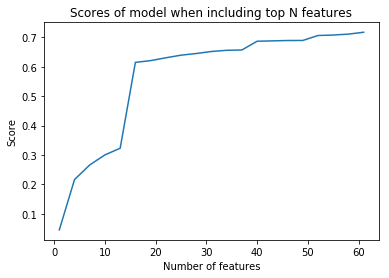

In [145]:
#create graph of above
import matplotlib.pyplot as plt

plt.plot(num_features_list, scores)
plt.title("Scores of model when including top N features")
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.show;

There is a sharp increase from 13 to 16 features. So if you care about including the fewest features 16 features with the highest amount of accuracy, then select 16 features. While if you care about the best model, then including everything that was selected from the stepwise function is the best model.